<a href="https://colab.research.google.com/github/sahana-roy/MBD-Work/blob/main/Regression%20model_Boston%20Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a regression model with the Boston Housing dataset

```
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's  (THIS IS THE TARGET)
```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "none"

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
X = pd.DataFrame(data)
y = pd.Series(target)

X.columns = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT"
]

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y.name = "MEDV"

y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [5]:
# ...then use the `sklearn` API to build a regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [6]:
data = pd.concat([X,y], axis=1)
px.scatter(data, x="DIS", y="MEDV", title="Data")

In [7]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()

In [8]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [9]:
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.401149,3.653859,-1.226095,-0.245698,-1.199016,2.231987,-1.278274,0.623686,-0.636934,-1.095990,-1.753696,0.388482,-1.266398
1,0.702723,-0.486534,0.995482,-0.245698,1.587329,0.176596,1.008537,-0.806000,1.675027,1.530409,0.808919,0.313998,0.940407
2,-0.389296,-0.486534,-1.028718,-0.245698,-0.391243,-1.008059,0.697674,-0.557330,-0.521336,-0.668160,-0.868429,0.433478,0.261930
3,-0.391244,-0.486534,-1.195840,-0.245698,-0.950404,0.487675,-0.399281,-0.136278,-0.868130,-0.787002,-0.216127,0.008419,-0.867459
4,-0.403599,2.782197,-1.035921,-0.245698,-1.251491,-0.559197,-0.763742,1.654751,-0.752532,0.359819,1.228256,0.433478,0.277382


In [10]:
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
#Build predictions
y_pred = linear_model.predict(X_test_scaled)

In [12]:
#Evaluate the model
accuracy = linear_model.score(X_test_scaled, y_test)
print("Model accuracy: ", round(accuracy*100, 2),"%")

Model accuracy:  65.92 %


In [13]:
#Plot the linear regression
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X_test.values.flatten(),
    y=y_test.values,
    mode="markers",
    name="Test Data"
))
fig.add_trace(go.Scatter(
    x=X_test.values.flatten(),
    y=y_pred,
    name="Linear Model"
))
fig.update_layout(title="Linear Regression", xaxis_title="Feat1", yaxis_title="Target")

In [14]:
#Plot the predictions
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode="markers", name="Predictions"))
fig.add_trace(go.Scatter(x=y_test, y=y_test, mode="lines", name="Actual"))
fig.update_layout(title="Predictions vs Actual", xaxis_title="Actual", yaxis_title="Predictions")
fig.show()

In [15]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [16]:
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [17]:
linear_model.fit(X_train_poly, y_train)
y_poly_pred = linear_model.predict(X_test_poly)

In [18]:
accuracy_2 = linear_model.score(X_test_poly, y_test)
print("Model accuracy: ", round(accuracy_2*100, 2),"%")

Model accuracy:  82.48 %


In [19]:
#Plot the polynomial regression
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_poly_pred, mode="markers", name="Predictions"))
fig.add_trace(go.Scatter(x=y_test, y=y_test, mode="lines", name="Actual"))
fig.update_layout(title="Predictions vs Actual", xaxis_title="Actual", yaxis_title="Predictions")
fig.show()

## Decision Tree Regression


In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
model_dt = DecisionTreeRegressor(criterion="squared_error", # function to measure the quality of a split
    max_depth=None,            # The maximum number of levels (depth) of the resulting tree. The more depth, the more complex (and the more risk of overfitting)
    min_samples_split=20,       # The minimum number of samples if a leaf to promote for splitting. The smaller this number, the more complex (and the more risk of overfitting)
    min_samples_leaf=20,        # The minimum number of samples in a terminal leaf of any branch. The smaller this number, the more complex (and the more risk of overfitting)
    random_state=123)


model_dt.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=20, min_samples_split=20,
                      random_state=123)

In [22]:
y_dt_pred = model_dt.predict(X_test)

In [23]:
accuracy_3 = model_dt.score(X_test, y_test)
print("Model accuracy: ", round(accuracy_3*100, 2),"%")

Model accuracy:  66.46 %


### Model Selection

In [24]:
parameters = {
    "splitter":["best", "random"],
    "min_samples_split":[2, 4, 6, 8, 10],
    "min_samples_leaf":[1, 2, 4, 6, 8, 10],
    "criterion":["absolute_error", "squared_error", "friedman_mse"]
}

In [25]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model_dt, param_grid=parameters, cv=3, verbose=3)

In [ ]:
grid_search.fit(X_train, y_train)

In [27]:
#Best parameters
grid_search.best_params_

{'criterion': 'absolute_error',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [28]:
#Best score
grid_search.best_score_

0.7911413808681883

In [29]:
#Hyperparameter tuned model
tuned_model_dt = DecisionTreeRegressor(criterion="absolute_error", # function to measure the quality of a split
    max_depth=None,            # The maximum number of levels (depth) of the resulting tree. The more depth, the more complex (and the more risk of overfitting)
    min_samples_split=2,       # The minimum number of samples if a leaf to promote for splitting. The smaller this number, the more complex (and the more risk of overfitting)
    min_samples_leaf=6,        # The minimum number of samples in a terminal leaf of any branch. The smaller this number, the more complex (and the more risk of overfitting),
    splitter="best",
    random_state=123)

In [30]:
tuned_model_dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=6,
                      random_state=123)

In [31]:
y_tuned_dt_pred = tuned_model_dt.predict(X_test)

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print("R2 score: ", r2_score(y_test, y_tuned_dt_pred))
print("MSE: ", mean_squared_error(y_test, y_tuned_dt_pred))
print("MAE: ", mean_absolute_error(y_test, y_tuned_dt_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_tuned_dt_pred))

R2 score:  0.6828874775378875
MSE:  26.236544117647064
MAE:  3.230882352941176
MAPE:  0.1390899680152001


In [33]:
r2 = r2_score(y_test, y_tuned_dt_pred)
print("Model accuracy: ", round(r2*100, 2),"%")

Model accuracy:  68.29 %


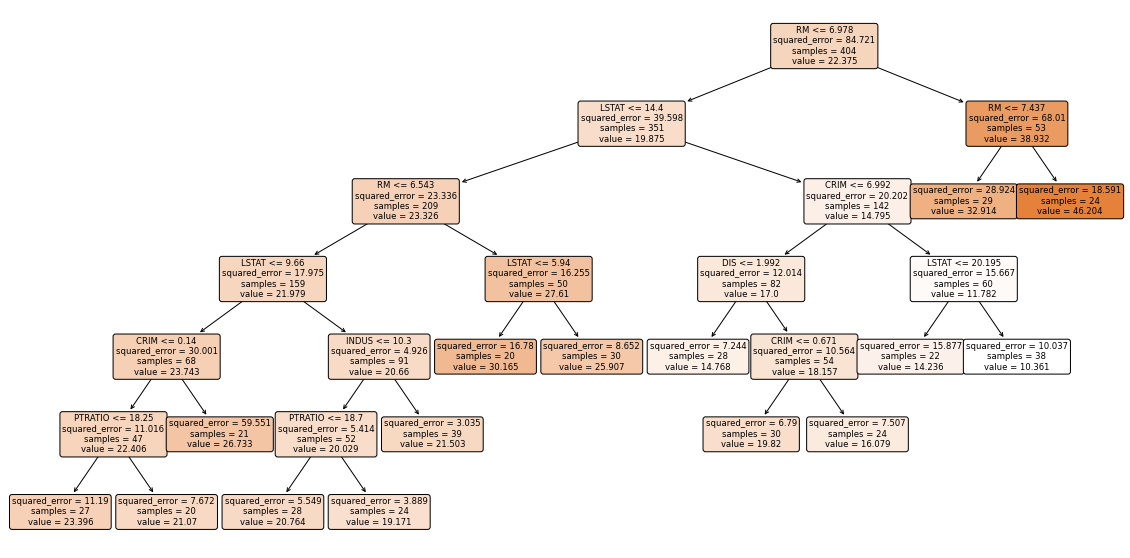

In [34]:
#Display the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model_dt, filled=True, rounded=True, feature_names=X.columns)
plt.show()

In [35]:
fig3 = go.Figure()

fig3.add_trace(go.Scatter(
    x=X_test.values.flatten(),
    y=y_test.values.flatten(),
    mode="markers",
    name="Test Data")
)

xline = pd.DataFrame(np.linspace(X_test[X_test.columns].min(), X_test[X_test.columns].max(), 1000))
yline = model_dt.predict(xline)
fig3.add_trace(go.Scatter(
    x=xline.values.flatten(),
    y=yline,
    mode="lines")
)
fig3.update_layout(title="Decision Tree Regression", xaxis_title="X", yaxis_title="y")


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names

